In [29]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import hvplot.pandas
import numpy as np
import seaborn as sns


In [30]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [31]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [32]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

# Initialize the `StandardScaler()`
scaler = StandardScaler()

# Normalize the data
scaled_data = scaler.fit_transform(market_data_df)



In [33]:
# Create a DataFrame with the scaled data
scaled_market_data_df = pd.DataFrame(scaled_data, columns=market_data_df.columns, index=market_data_df.index)

# Display sample data
scaled_market_data_df.head(10)


# Copy the crypto names from the original data
crypto_names = market_data_df.index.tolist()

# Set the coinid column as index
scaled_market_data_df.index = crypto_names


# Display sample data
scaled_market_data_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [34]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans_model = KMeans(n_clusters=k, random_state=1)
    
    # Fit the model to the data using the scaled DataFrame
    kmeans_model.fit(scaled_market_data_df)
    
    # Append the model.inertia_ to the inertia list
    inertia_values.append(kmeans_model.inertia_)


# Create a dictionary with the data to plot the Elbow curve

elbow_data = {"k": k_values, "inertia": inertia_values}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df

/Users/luko90s/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/luko90s/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/luko90s/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/luko90s/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: Fut

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,63.858668
5,6,53.057788
6,7,44.406791
7,8,37.078233
8,9,32.832187
9,10,28.165433


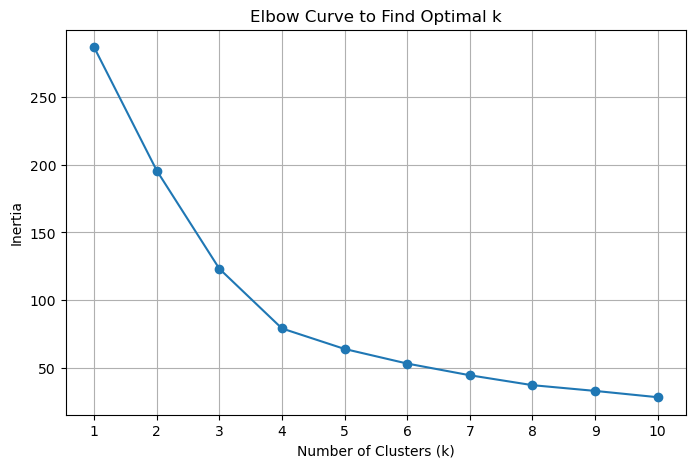

In [35]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(elbow_df["k"], elbow_df["inertia"], marker="o")
plt.title("Elbow Curve to Find Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid()
plt.show()

In [36]:
# Calculate the percentage change in inertia
elbow_df["percentage_change"] = elbow_df["inertia"].pct_change(periods=-1) * 100

# Display the updated DataFrame
print(elbow_df)

# Find the largest percentage change to determine the elbow point
optimal_k_index = elbow_df["percentage_change"].idxmax()
optimal_k = elbow_df.loc[optimal_k_index, "k"]
print(f"The optimal k value is {optimal_k}")



    k     inertia  percentage_change
0   1  287.000000          46.563007
1   2  195.820218          58.957263
2   3  123.190482          55.893046
3   4   79.022435          23.745825
4   5   63.858668          20.356822
5   6   53.057788          19.481250
6   7   44.406791          19.765120
7   8   37.078233          12.932571
8   9   32.832187          16.569083
9  10   28.165433                NaN
The optimal k value is 2


#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** The best value for `k` is **2**, as indicated by the elbow in the inertia curve and the highest percentage change after \( k = 1 \), which suggests the most significant improvement in clustering quality.


### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [37]:
# Initialize the K-Means model using the best value for k
# Initialize the K-Means model using the best value for k (replace `best_k` with the optimal k identified earlier)
best_k = 4  # Example value, replace with the actual optimal value
kmeans = KMeans(n_clusters=best_k, random_state=1)

In [38]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_market_data_df)

/Users/luko90s/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=1)

In [39]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters = kmeans.predict(scaled_market_data_df)
# View the resulting array of cluster values.


In [40]:
# Create a copy of the DataFrame
clustered_crypto_df = scaled_market_data_df.copy()

In [41]:
# Add a new column to the DataFrame with the predicted clusters
clustered_crypto_df["Cluster"] = crypto_clusters


# Display sample data
clustered_crypto_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


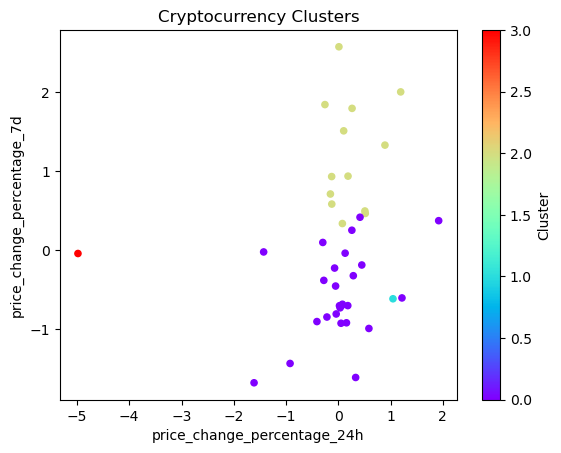

In [42]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

clustered_crypto_df.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Cluster",
    colormap="rainbow",
    title="Cryptocurrency Clusters"
)
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [43]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [44]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
crypto_pca = pca.fit_transform(scaled_market_data_df)

# Create a new DataFrame with the principal components
crypto_pca_df = pd.DataFrame(
    crypto_pca,
    columns=["PC1", "PC2", "PC3"],
    index=scaled_market_data_df.index
)

# View the first five rows of the DataFrame. 
crypto_pca_df.head()

,PC1,PC2,PC3
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


In [45]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance}")

Explained variance ratio: [0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [46]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_crypto_df = pd.DataFrame(
    crypto_pca, 
    columns=["PCA1", "PCA2", "PCA3"],
    index=scaled_market_data_df.index
)

# Copy the crypto names from the original data
pca_crypto_df["Crypto_Name"] = market_data_df.index

# Set the coinid column as index


# Display sample data
pca_crypto_df.head()

,PCA1,PCA2,PCA3,Crypto_Name
bitcoin,-0.600667,0.842760,0.461595,bitcoin
ethereum,-0.458261,0.458466,0.952877,ethereum
tether,-0.433070,-0.168126,-0.641752,tether
ripple,-0.471835,-0.222660,-0.479053,ripple
bitcoin-cash,-1.157800,2.041209,1.859715,bitcoin-cash


### Find the Best Value for k Using the PCA Data

In [47]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia_values_pca = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using PCA DataFrame.
# 3. Append the model.inertia_ to the inertia list

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans_pca = KMeans(n_clusters=k, random_state=1)
    
    # Fit the model to the data using the PCA DataFrame
    kmeans_pca.fit(pca_crypto_df[["PCA1", "PCA2", "PCA3"]])
    
    # Append the model.inertia_ to the inertia list
    inertia_values_pca.append(kmeans_pca.inertia_)


# Create a dictionary with the data to plot the Elbow curve
elbow_data_pca = {"k": k_values, "inertia": inertia_values_pca}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df_pca = pd.DataFrame(elbow_data_pca)


# Display the DataFrame
elbow_df_pca

/Users/luko90s/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/luko90s/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/luko90s/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/luko90s/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: Fut

,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,38.072792
5,6,27.720626
6,7,21.145312
7,8,17.208546
8,9,13.719376
9,10,10.559358


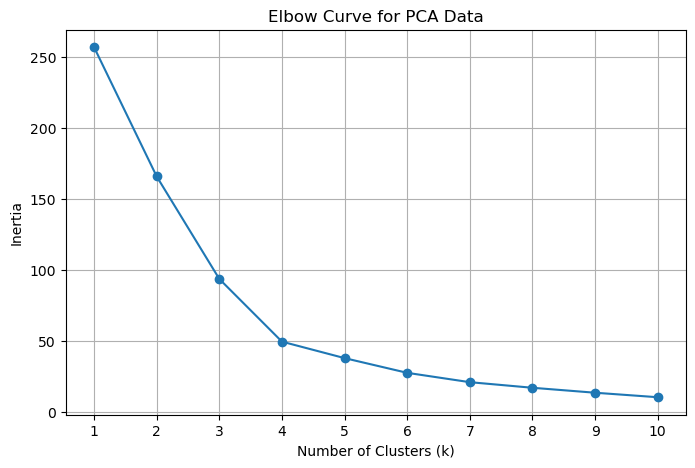

In [48]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.


plt.figure(figsize=(8, 5))
plt.plot(elbow_df_pca["k"], elbow_df_pca["inertia"], marker="o", linestyle="-")
plt.title("Elbow Curve for PCA Data")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid()
plt.show()

In [49]:
# Calculate the percentage change in inertia
elbow_df_pca["percentage_change"] = elbow_df_pca["inertia"].pct_change(periods=-1) * 100

# Display the updated DataFrame
print(elbow_df_pca)

# Find the largest percentage change to determine the elbow point
optimal_k_index = elbow_df_pca["percentage_change"].idxmax()
optimal_k = elbow_df_pca.loc[optimal_k_index, "k"]
print(f"The optimal k value is {optimal_k}")


    k     inertia  percentage_change
0   1  256.874086          54.834839
1   2  165.901994          76.915656
2   3   93.774626          88.812419
3   4   49.665497          30.448790
4   5   38.072792          37.344632
5   6   27.720626          31.095848
6   7   21.145312          22.876810
7   8   17.208546          25.432420
8   9   13.719376          29.926241
9  10   10.559358                NaN
The optimal k value is 3


#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?
  * **Answer:** The best value for `k` when using the PCA data is **3**, as indicated by the elbow in the inertia curve and the significant percentage change.

* **Question:** Does it differ from the best `k` value found using the original data?
  * **Answer:** Yes, the best `k` value differs. The original data suggested an optimal `k` of **2**, while the PCA data suggests an optimal `k` of **3**. PCA can often refine clustering results by reducing dimensionality and emphasizing the most important features, leading to a different interpretation of the optimal number of clusters.



### Cluster Cryptocurrencies with K-means Using the PCA Data

In [50]:
# Initialize the K-Means model using the best value for k
best_k_pca = 3  # Example value, replace with the actual value
kmeans_pca = KMeans(n_clusters=best_k_pca, random_state=1)

In [51]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(pca_crypto_df[["PCA1", "PCA2", "PCA3"]])

/Users/luko90s/opt/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=1)

In [52]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters_pca = kmeans_pca.predict(pca_crypto_df[["PCA1", "PCA2", "PCA3"]])

# Print the resulting array of cluster values
clusters_pca


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0],
      dtype=int32)

In [53]:
# Create a copy of the DataFrame with the PCA data
clustered_pca_crypto_df = pca_crypto_df.copy()

# Add a new column to the DataFrame with the predicted clusters
clustered_pca_crypto_df["Cluster"] = clusters_pca

# Display sample data
clustered_pca_crypto_df.head()

,PCA1,PCA2,PCA3,Crypto_Name,Cluster
bitcoin,-0.600667,0.842760,0.461595,bitcoin,0
ethereum,-0.458261,0.458466,0.952877,ethereum,0
tether,-0.433070,-0.168126,-0.641752,tether,0
ripple,-0.471835,-0.222660,-0.479053,ripple,0
bitcoin-cash,-1.157800,2.041209,1.859715,bitcoin-cash,0


In [57]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 

# Create a scatter plot using hvPlot
scatter_plot = clustered_pca_crypto_df.hvplot.scatter(
    x="PCA1",
    y="PCA2",
    c="Cluster",
    colormap="rainbow",
    title="PCA-Reduced Cryptocurrency Clusters",
    size=100,  # Adjust marker size
    width=800,
    height=600
)

# Display the scatter plot
scatter_plot

:Scatter   [PCA1]   (PCA2,Cluster)

### Determine the Weights of Each Feature on each Principal Component

In [55]:
# Use the columns from the original scaled DataFrame as the index.

# Create a DataFrame with the PCA components
pca_weights_df = pd.DataFrame(
    pca.components_,
    columns=scaled_market_data_df.columns,
    index=["PC1", "PC2", "PC3"]
)

# Display the PCA weights DataFrame
pca_weights_df

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
PC1,-0.416728,-0.102432,-0.009162,0.191523,0.320365,0.594468,0.568379
PC2,0.358162,0.227432,0.540415,0.562182,0.434040,0.027735,-0.150789
PC3,-0.218795,0.787670,0.349534,-0.181744,-0.361377,0.039733,0.210541


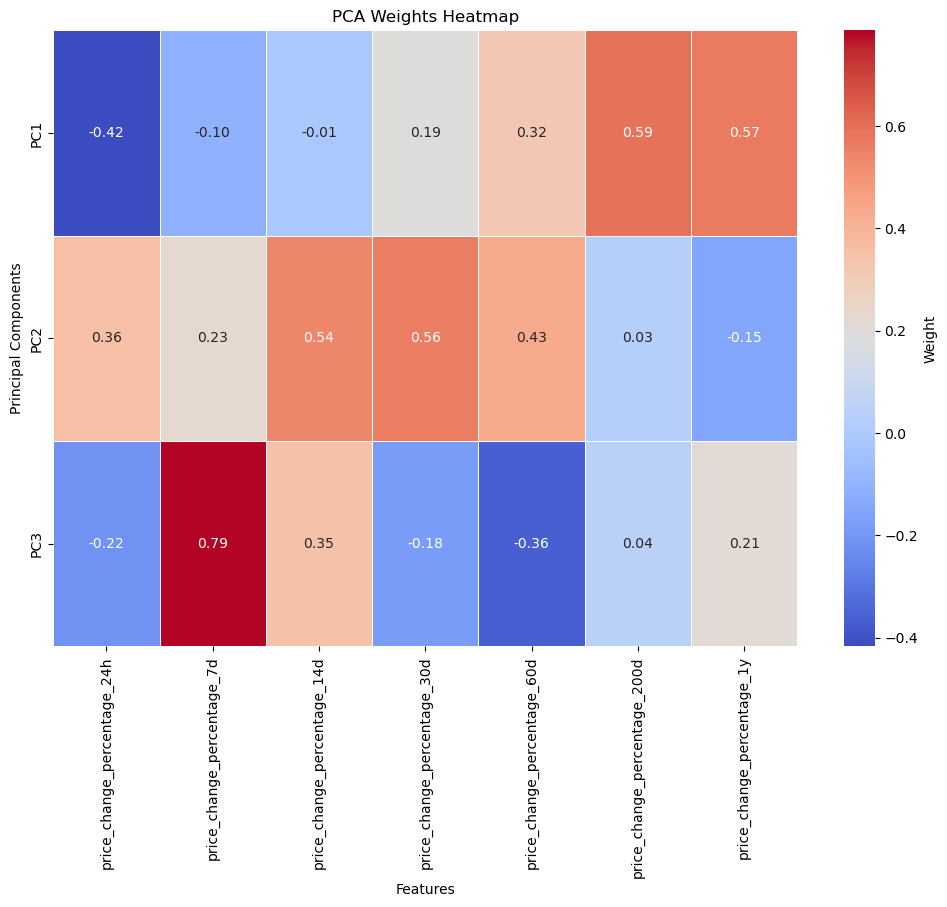

In [56]:
# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap for the PCA weights
sns.heatmap(
    pca_weights_df,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"label": "Weight"},
    linewidths=0.5,
    square=False  # Ensure the heatmap remains rectangular
)

plt.title("PCA Weights Heatmap")
plt.xlabel("Features")
plt.ylabel("Principal Components")
plt.show()



#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
### Analysis of Strongest Influence on Each Principal Component

- **PC1**:
  - **Strongest Positive Influence**: `price_change_percentage_60d` (weight = **0.59**)

- **PC2**:
  - **Strongest Positive Influence**: `price_change_percentage_30d` (weight = **0.56**)

- **PC3**:
  - **Strongest Positive Influence**: `price_change_percentage_7d` (weight = **0.79**)

### Summary
Each principal component is driven most strongly by specific features:
- PC1 is influenced by long-term price changes (60-day percentage).
- PC2 is influenced by mid-term price changes (30-day percentage).
- PC3 is influenced by short-term weekly changes (7-day percentage).



    